In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from GA import genetic_algorithm
from DE import differential_evolution
from PSO import particle_swarm
from Rastrigin import rastrigin
import pandas as pd

In [2]:
ga_sol, ga_fit, ga_curve = genetic_algorithm()
print(f"[GA] Best solution: {ga_sol}, Fitness: {ga_fit}")

[GA] Best solution: [-4.89015499e-05  4.76133225e-06], Fitness: 4.789248180259165e-07


In [3]:
df = pd.DataFrame({
    'Generation': np.arange(len(ga_curve)),
    'GA': ga_curve,
})
df.to_csv(r"D:\Newfolder\Uni\Courses\Adv Opt\Assignments\Ass 2\rastrigin-optimization-metaheuristics\fitness_logs\GA_fitness", index=False)
df.to_excel(r"D:\Newfolder\Uni\Courses\Adv Opt\Assignments\Ass 2\rastrigin-optimization-metaheuristics\fitness_logs\GA_fitness.xlsx", index=False)

In [4]:
de_sol, de_fit, de_curve = differential_evolution()
print(f"[DE] Best solution: {de_sol}, Fitness: {de_fit}")

[DE] Best solution: [-3.89577613e-07  8.38181378e-08], Fitness: 3.150368854676344e-11


In [5]:
df = pd.DataFrame({
    'Generation': np.arange(len(de_curve)),
    'DE': de_curve,
})
df.to_csv(r"D:\Newfolder\Uni\Courses\Adv Opt\Assignments\Ass 2\rastrigin-optimization-metaheuristics\fitness_logs\DE_fitness", index=False)
df.to_excel(r"D:\Newfolder\Uni\Courses\Adv Opt\Assignments\Ass 2\rastrigin-optimization-metaheuristics\fitness_logs\DE_fitness.xlsx", index=False)

In [6]:
pso_sol, pso_fit, pso_curve = particle_swarm()
print(f"[PSO] Best solution: {pso_sol}, Fitness: {pso_fit}")

[PSO] Best solution: [-3.07668627e-05  8.71209893e-06], Fitness: 8.614950530727583e-09


In [7]:
df = pd.DataFrame({
    'Generation': np.arange(len(pso_curve)),
    'DE': pso_curve,
})
df.to_csv(r"D:\Newfolder\Uni\Courses\Adv Opt\Assignments\Ass 2\rastrigin-optimization-metaheuristics\fitness_logs\PSO_fitness", index=False)
df.to_excel(r"D:\Newfolder\Uni\Courses\Adv Opt\Assignments\Ass 2\rastrigin-optimization-metaheuristics\fitness_logs\PSO_fitness.xlsx", index=False)

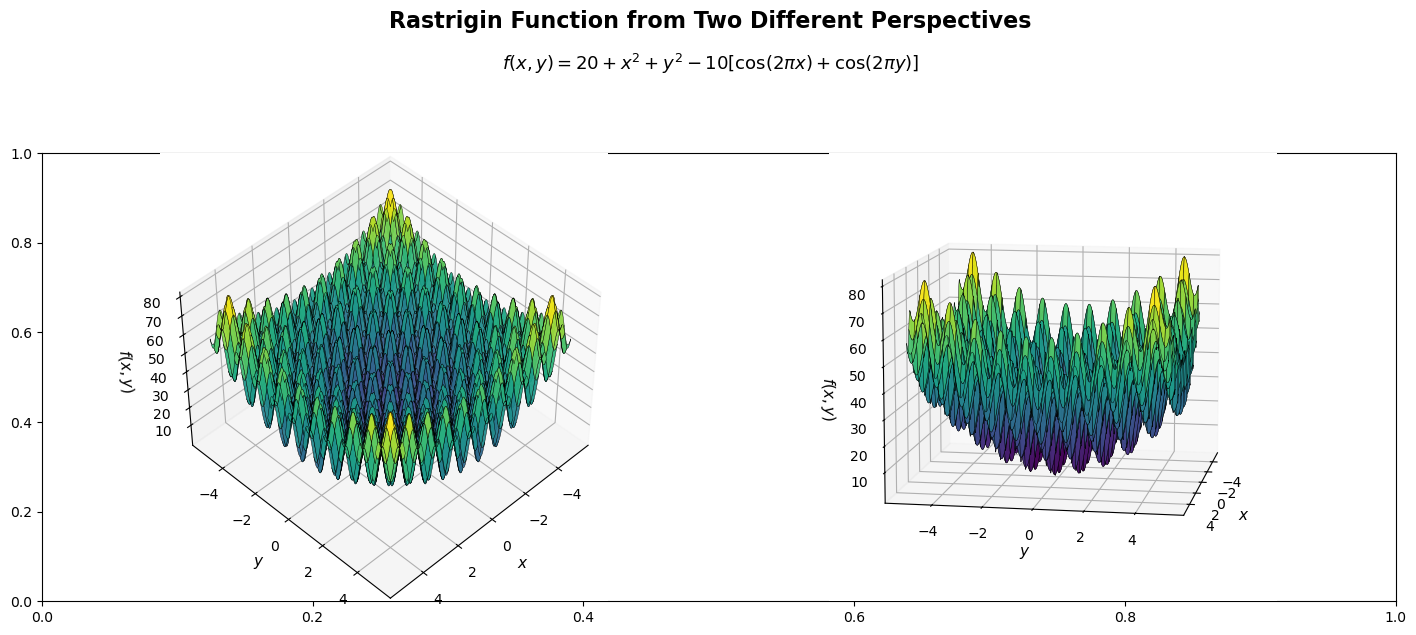

In [8]:
"""
First, the values for Axis are defined. 
After that, Values for different X and Y are stored with a resolution of 100.
"""
x = np.linspace(-5.12, 5.12, 500)
y = np.linspace(-5.12, 5.12, 500)
X, Y = np.meshgrid(x, y)

Z = np.zeros_like(X)
for i in range(500):
    for j in range(500):
        Z[i, j] = rastrigin([X[i, j], Y[i, j]])


fig = plt.figure(figsize=(14, 6))

fig.suptitle(r"Rastrigin Function from Two Different Perspectives", fontsize=16, fontweight='bold', y=1.05)
plt.text(
    0.5, 0.95,
    r"$f(x, y) = 20 + x^2 + y^2 - 10[\cos(2\pi x) + \cos(2\pi y)]$",
    fontsize=13,
    ha='center',
    transform=fig.transFigure
)

ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(X, Y, Z, cmap=cm.viridis, edgecolor='k', linewidth=0.3, alpha=0.95, antialiased=True)
#ax1.set_title(r"Rastrigin Function $f(x, y) = 20 + x^2 + y^2 - 10[\cos(2\pi x) + \cos(2\pi y)]$ View 1", fontsize=14, pad=20)
ax1.set_xlabel(r"$x$", fontsize=11)
ax1.set_ylabel(r"$y$", fontsize=11)
ax1.set_zlabel(r"$f(x, y)$", fontsize=11)
ax1.view_init(elev=45, azim=45)


ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(X, Y, Z, cmap=cm.viridis, edgecolor='k', linewidth=0.3, alpha=0.95, antialiased=True)
#ax2.set_title(r"Rastrigin Function $f(x, y) = 20 + x^2 + y^2 - 10[\cos(2\pi x) + \cos(2\pi y)]$ View 2", fontsize=14, pad=20)
ax2.set_xlabel(r"$x$", fontsize=11)
ax2.set_ylabel(r"$y$", fontsize=11)
ax2.set_zlabel(r"$f(x, y)$", fontsize=11)
ax2.view_init(elev=10, azim=10)


#fig.colorbar(surf1, ax=[ax1, ax2], shrink=0.6, aspect=18, pad=0.1, label='Function Value')

plt.tight_layout()
plt.show()

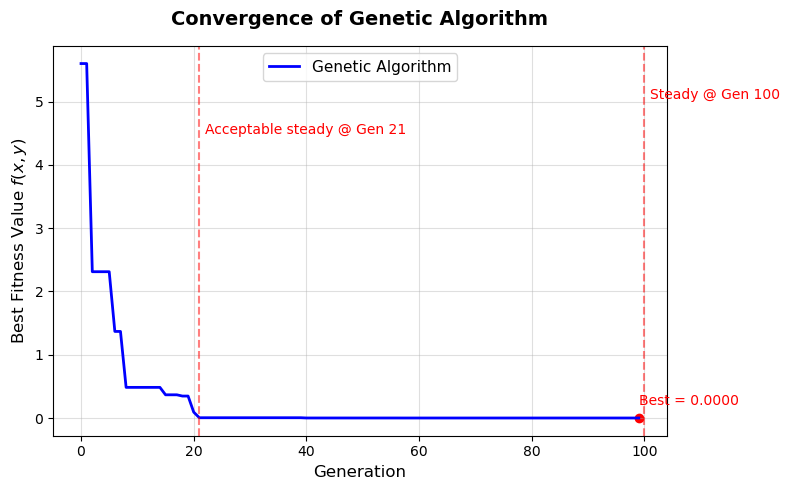

In [9]:
ga_curve = np.array(ga_curve)  # making the curve numpy array

#Determining when the curve enters the final steady state
for i in range(len(ga_curve) - 30):
    delta = np.abs(ga_curve[i+1:i+30] - ga_curve[i:i+29])
    if np.all(delta < 1e-6):
        steady_gen = i
        break
    else:
        steady_gen = len(ga_curve)
#Determining when the curve enters an acceptable steady state
for j in range(len(ga_curve) - 30):
    delta = np.abs(ga_curve[j+1:j+30] - ga_curve[j:j+29])
    if np.all(delta < 1e-2):
        acceptable_steady_gen = j
        break
    else:
        acceptable_steady_gen = len(ga_curve)
best_fit = ga_curve[-1]

plt.figure(figsize=(8, 5))
plt.plot(ga_curve, label='Genetic Algorithm', color='blue', linewidth=2)

plt.scatter(len(ga_curve)-1, best_fit, color='red', marker='o')
plt.text(len(ga_curve)-1, best_fit + 0.2, f"Best = {best_fit:.4f}", fontsize=10, color='red')

plt.axvline(steady_gen, linestyle='--', color='red', alpha=0.5)
plt.text(steady_gen + 1, max(ga_curve)*0.9, f"Steady @ Gen {steady_gen}", fontsize=10, color='red')

plt.axvline(acceptable_steady_gen, linestyle='--', color='red', alpha=0.5)
plt.text(acceptable_steady_gen + 1, max(ga_curve)*0.8, f"Acceptable steady @ Gen {acceptable_steady_gen}", fontsize=10, color='red')

plt.xlabel(r'Generation', fontsize=12)
plt.ylabel(r'Best Fitness Value $f(x, y)$', fontsize=12)
plt.title(fr'Convergence of Genetic Algorithm', fontsize=14, fontweight='bold', pad=15)
plt.legend(fontsize=11)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

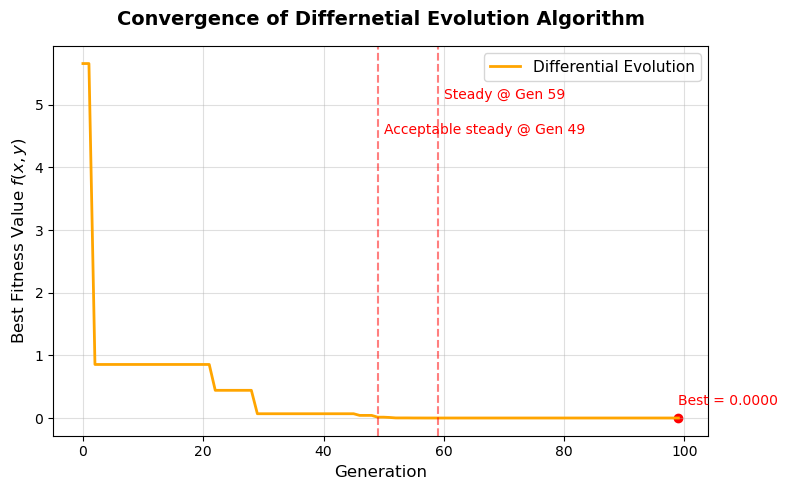

In [10]:
de_curve = np.array(de_curve)  # making the curve numpy array

#Determining when the curve enters the final steady state
for i in range(len(de_curve) - 30):
    delta = np.abs(de_curve[i+1:i+30] - de_curve[i:i+29])
    if np.all(delta < 1e-6):
        steady_gen = i
        break
    else:
        steady_gen = len(de_curve)
#Determining when the curve enters an acceptable steady state
for j in range(len(de_curve) - 30):
    delta = np.abs(de_curve[j+1:j+30] - de_curve[j:j+29])
    if np.all(delta < 1e-2):
        acceptable_steady_gen = j
        break
    else:
        acceptable_steady_gen = len(de_curve)
best_fit = de_curve[-1]

plt.figure(figsize=(8, 5))
plt.plot(de_curve, label='Differential Evolution', color='orange', linewidth=2)

plt.scatter(len(de_curve)-1, best_fit, color='red', marker='o')
plt.text(len(de_curve)-1, best_fit + 0.2, f"Best = {best_fit:.4f}", fontsize=10, color='red')

plt.axvline(steady_gen, linestyle='--', color='red', alpha=0.5)
plt.text(steady_gen + 1, max(de_curve)*0.9, f"Steady @ Gen {steady_gen}", fontsize=10, color='red')

plt.axvline(acceptable_steady_gen, linestyle='--', color='red', alpha=0.5)
plt.text(acceptable_steady_gen + 1, max(de_curve)*0.8, f"Acceptable steady @ Gen {acceptable_steady_gen}", fontsize=10, color='red')

plt.xlabel(r'Generation', fontsize=12)
plt.ylabel(r'Best Fitness Value $f(x, y)$', fontsize=12)
plt.title(fr'Convergence of Differnetial Evolution Algorithm', fontsize=14, fontweight='bold', pad=15)
plt.legend(fontsize=11)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

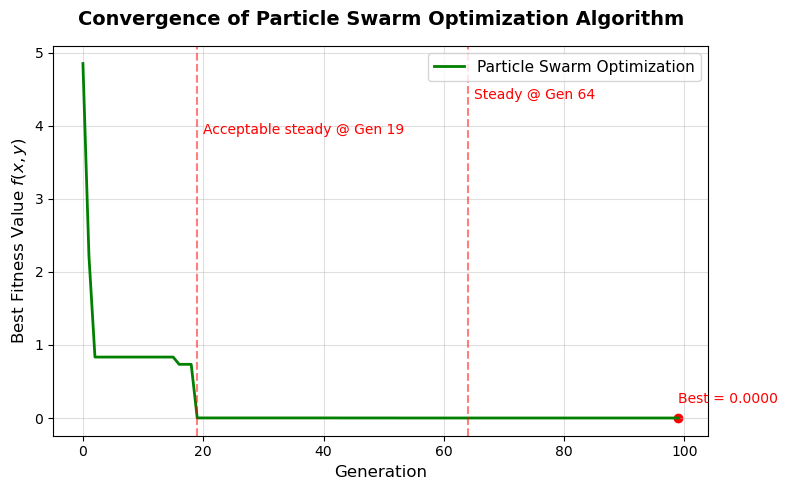

In [11]:
pso_curve = np.array(pso_curve)  # making the curve numpy array

#Determining when the curve enters the final steady state
for i in range(len(pso_curve) - 30):
    delta = np.abs(pso_curve[i+1:i+30] - pso_curve[i:i+29])
    if np.all(delta < 1e-6):
        steady_gen = i
        break
    else:
        steady_gen = len(pso_curve)
#Determining when the curve enters an acceptable steady state
for j in range(len(pso_curve) - 30):
    delta = np.abs(pso_curve[j+1:j+30] - pso_curve[j:j+29])
    if np.all(delta < 1e-2):
        acceptable_steady_gen = j
        break
    else:
        acceptable_steady_gen = len(pso_curve)
best_fit = pso_curve[-1]

plt.figure(figsize=(8, 5))
plt.plot(pso_curve, label='Particle Swarm Optimization', color='green', linewidth=2)

plt.scatter(len(pso_curve)-1, best_fit, color='red', marker='o')
plt.text(len(pso_curve)-1, best_fit + 0.2, f"Best = {best_fit:.4f}", fontsize=10, color='red')

plt.axvline(steady_gen, linestyle='--', color='red', alpha=0.5)
plt.text(steady_gen + 1, max(pso_curve)*0.9, f"Steady @ Gen {steady_gen}", fontsize=10, color='red')

plt.axvline(acceptable_steady_gen, linestyle='--', color='red', alpha=0.5)
plt.text(acceptable_steady_gen + 1, max(pso_curve)*0.8, f"Acceptable steady @ Gen {acceptable_steady_gen}", fontsize=10, color='red')

plt.xlabel(r'Generation', fontsize=12)
plt.ylabel(r'Best Fitness Value $f(x, y)$', fontsize=12)
plt.title(fr'Convergence of Particle Swarm Optimization Algorithm', fontsize=14, fontweight='bold', pad=15)
plt.legend(fontsize=11)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

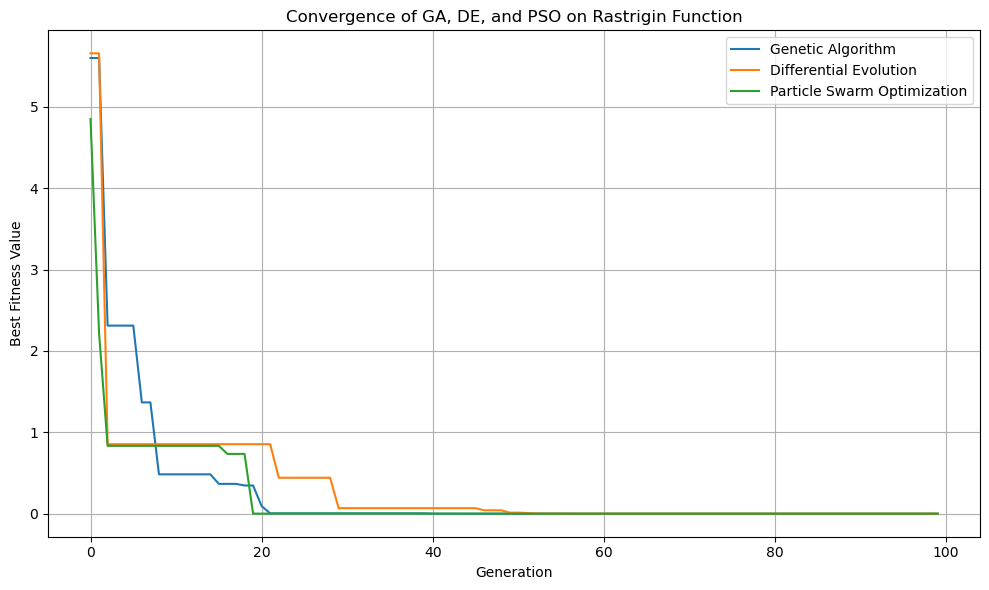

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(ga_curve, label='Genetic Algorithm')
plt.plot(de_curve, label='Differential Evolution')
plt.plot(pso_curve, label='Particle Swarm Optimization')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.title('Convergence of GA, DE, and PSO on Rastrigin Function')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()